In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'


In [6]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
num_classes = 10
input_shape = (28, 28, 1)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [4]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"), 
        layers.AveragePooling2D(pool_size=(2,2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"), 
        layers.Conv2D(16, kernel_size=(9, 9), activation="relu"), 
        layers.AveragePooling2D(pool_size=(2,2)),
        layers.SpatialDropout2D(0.5),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
average_pooling2d (AveragePo (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 16)          41488     
_________________________________________________________________
average_pooling2d_1 (Average (None, 1, 1, 16)          0         
_________________________________________________________________
spatial_dropout2d (SpatialDr (None, 1, 1, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 16)                0

In [7]:
batch_size = 128
epochs = 7
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
with tf.device('/gpu:0'):
    model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/7
366/422 [=========================>....] - ETA: 3s - loss: 1.0401 - accuracy: 0.6066

KeyboardInterrupt: 

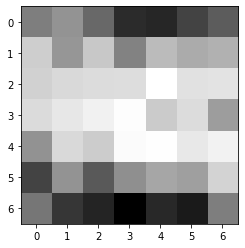

In [109]:
np.shape(model.get_weights()[2])
m = model.get_weights()[0]
dim = 7
sv = [[m[i][j][0] for j in range(dim)] for i in range(dim)]
p1 = [[sv[i][j][0] for j in range(dim)] for i in range(dim)]
plt.imshow(p1, cmap='gray')
 

In [116]:
model.save("model.h5")